# Chapter 09: Orthogonal Matrices & QR Decomposition

## Concepts

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# Orthogonal Matrices

# Create two orthoginal matrices
orthogonal_matrix_1 = np.array([ [1,-1],[1,1] ]) / np.sqrt(2)
orthogonal_matrix_2 = np.array([ [1,2,2],[2,1,-2],[-2,2,-1] ]) / 3

# Multiply matrices by their transpose
matrix_q1_tranpose_product = orthogonal_matrix_1.T @ orthogonal_matrix_1
matrix_q2_tranpose_product = orthogonal_matrix_2.T @ orthogonal_matrix_2

# Check if matrix product equals identity matrix
check_1 = np.allclose(matrix_q1_tranpose_product, np.eye(2))
check_2 = np.allclose(matrix_q2_tranpose_product, np.eye(3))

print("Orthogonal Matrix 1 multipled by its transpose equals the Identity Matrix:", check_1)
print("Orthogonal Matrix 2 multipled by its transpose equals the Identity Matrix:", check_2)


Orthogonal Matrix 1 multipled by its transpose equals the Identity Matrix: True
Orthogonal Matrix 2 multipled by its transpose equals the Identity Matrix: True


In [57]:
# QR Decomposition

def perform_and_plot_qr(matrix_a, mode=None):
    """Performs QR decomposition of a matrix and visualizes the results along with their properties."""
    
    # Perform QR decomposition based on the mode
    if mode == 'complete' or mode == 'reduced':
        matrix_q, matrix_r = np.linalg.qr(matrix_a, mode)
    else:
        matrix_q, matrix_r = np.linalg.qr(matrix_a)

    # Calculate difference between matrix a and matrix q,r product
    matrix_difference = matrix_a - (matrix_q @ matrix_r)

    # Calculate orthogonal matrix transpose product
    matrix_product = matrix_q.T @ matrix_q

    # Create Plot
    fig, axis = plt.subplots(1, 5, figsize=(10, 4))
    titles = ['A', 'Q', 'R', 'A - QR', 'Q^TQ']
    matrices = [matrix_a, matrix_q, matrix_r, matrix_difference, matrix_product]

    for i, (title, matrix) in enumerate(zip(titles, matrices)):
        ax = axis[i]
        ax.imshow(matrix, cmap='gray', vmin=0, vmax=1)
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

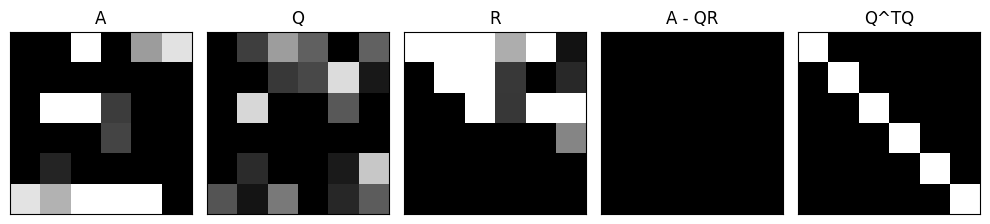

In [58]:
# QR Decomposition

# For a square matrix (reduced by default)
matrix_a = np.random.randn(6, 6)
perform_and_plot_qr(matrix_a)

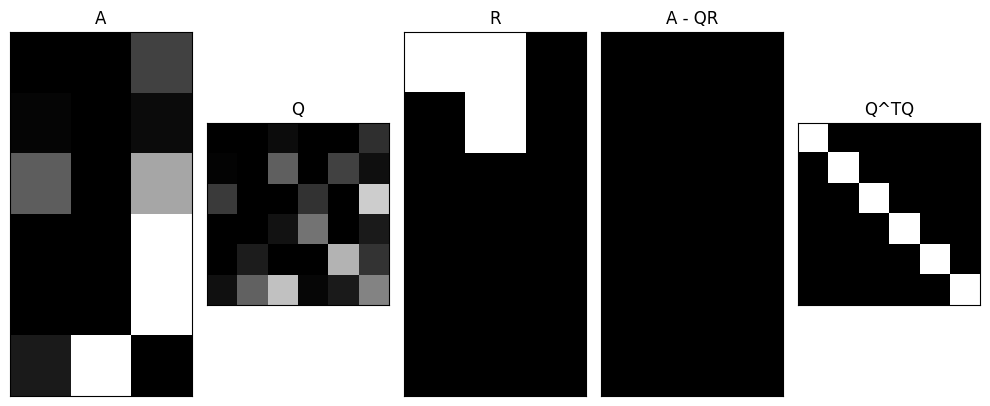

In [59]:
# QR Decomposition (Tall Matrices, Full)

# For a tall matrix with 'complete' mode
matrix_b = np.random.randn(6, 3)
perform_and_plot_qr(matrix_b, 'complete')

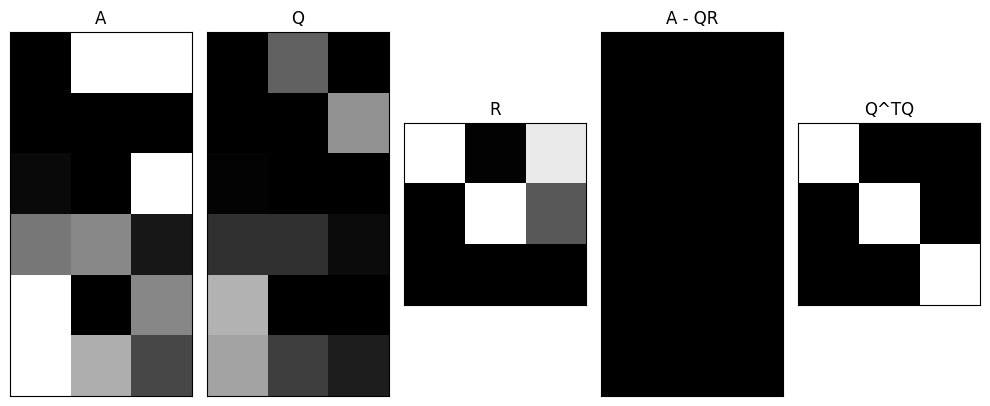

In [60]:
# QR Decomposition (Tall Matrices, Economy)

# For a tall matrix with 'economy' mode
matrix_c = np.random.randn(6, 3)
perform_and_plot_qr(matrix_c, 'reduced')

## Code Exercises

In [61]:
# Exercise 9-1 (Orthogonal matrix multiplied by its Transpose equals the Identity matrix)

# Generate a random matrix and perform QR decomposition
random_matrix_a = np.random.randn(5, 5)
matrix_q, matrix_r = np.linalg.qr(random_matrix_a)

# Matrix products
matrix_product_1 = matrix_q @ matrix_q.T
matrix_product_2 = matrix_q.T @ matrix_q
matrix_product_3 = np.linalg.inv(matrix_q) @ matrix_q
matrix_product_4 = matrix_q @ np.linalg.inv(matrix_q)

# Check if all matrix products are close to the identity matrix
def check_identity(matrix, size=5):
    """Check if the given matrix is close to the identity matrix of a specified size."""
    identity_matrix = np.eye(size)
    return np.allclose(matrix, identity_matrix)

# Test all matrices
results = {
    'QQ^T is Identity': check_identity(matrix_product_1),
    'Q^TQ is Identity': check_identity(matrix_product_2),
    'inv(Q)Q is Identity': check_identity(matrix_product_3),
    'Qinv(Q) is Identity': check_identity(matrix_product_4)
}

# Print results
for test, result in results.items():
    print(f"{test}: {result}")

QQ^T is Identity: True
Q^TQ is Identity: True
inv(Q)Q is Identity: True
Qinv(Q) is Identity: True


In [75]:
# Exercise 9-2 (Gram-Schmidt procedure)

def gram_schmidt(matrix_a):
    """Perform the Gram-Schmidt process to orthogonalize a set of vectors (columns of matrix_a)."""
    num_rows, num_columns = matrix_a.shape
    matrix_q = np.zeros((num_rows, num_columns))
    
    for i in range(num_columns):
        # Start with the current column of matrix_a
        q = matrix_a[:, i]
        
        # Subtract projections of q onto the previously obtained orthogonal vectors
        for j in range(i):
            q -= np.dot(matrix_q[:, j], matrix_a[:, i]) * matrix_q[:, j] / np.dot(matrix_q[:, j], matrix_q[:, j])
        
        # Normalize the vector
        matrix_q[:, i] = q / np.linalg.norm(q)
        
    return matrix_q

# Create random numbers matrix
random_matrix_a = np.random.randn(4, 4)

# Execute our implementation of Gram-Schmidt procedure
orthogonal_matrix = gram_schmidt(random_matrix_a)

# Calculate orthogonal matrix of matrix_a using numpy qr decomposition
matrix_q, matrix_r = np.linalg.qr(random_matrix_a)

# Verify that the columns are orthogonal by checking if Q^T Q is close to the identity matrix
identity_matrix = np.eye(4)
is_orthogonal = np.allclose(np.dot(orthogonal_matrix.T, orthogonal_matrix), identity_matrix)

# Verify our implementation yields same result as numpy
similarity_check = np.allclose(np.abs(orthogonal_matrix), np.abs(matrix_q))

print("Is Q^T Q close to the identity matrix?:", is_orthogonal)
print("Is our resulting orthogonal matrix effectively the same as numpy's?:", similarity_check)


Is Q^T Q close to the identity matrix?: True
Is our resulting orthogonal matrix effectively the same as numpy's?: True


In [ ]:
# Exercise 9-3 (QR decomposition on almost orthogonal matrix)

In [ ]:
# Exercise 9-4 (Compare Matrix inverse implementations)

In [ ]:
# Exercise 9-5 (Matrix Inverse implementations experiment)

In [ ]:
# Exercise 9-6 (Orthogonal matrices can rotate but not scale vectors)

In [ ]:
# Exercise 9-7 (Invertibility and inverse calculations of the R matrix)